In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

import pandas as pd
df = pd.read_csv("dag.us (1).txt")


import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df.head()

Saving dag.us.txt to dag.us (1).txt


,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-04-15,25.74,25.80,25.63,25.63,20000,0
1,2008-04-16,26.01,26.03,25.60,25.85,30115,0
2,2008-04-17,26.30,26.33,25.45,25.74,10400,0
3,2008-04-18,25.25,25.25,24.52,25.13,15908,0
4,2008-04-21,24.08,24.08,22.80,23.28,19929,0


In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close  Volume  OpenInt
0  2008-04-15  25.74  25.80  25.63  25.63   20000        0
1  2008-04-16  26.01  26.03  25.60  25.85   30115        0
2  2008-04-17  26.30  26.33  25.45  25.74   10400        0
3  2008-04-18  25.25  25.25  24.52  25.13   15908        0
4  2008-04-21  24.08  24.08  22.80  23.28   19929        0
(2409, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


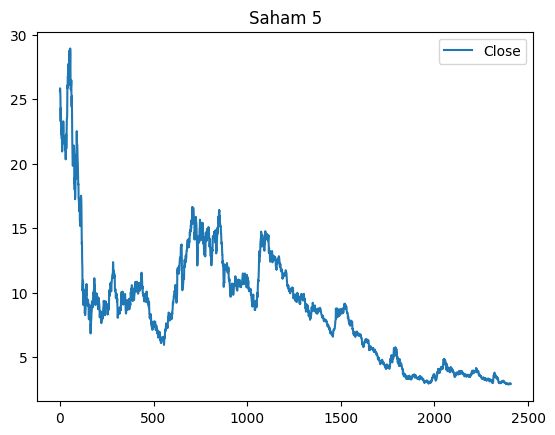

In [ ]:
df[['Close']].plot()
plt.title("Saham 5")
plt.show()

Text(0.5, 1.0, 'Saham dan ETF 5')

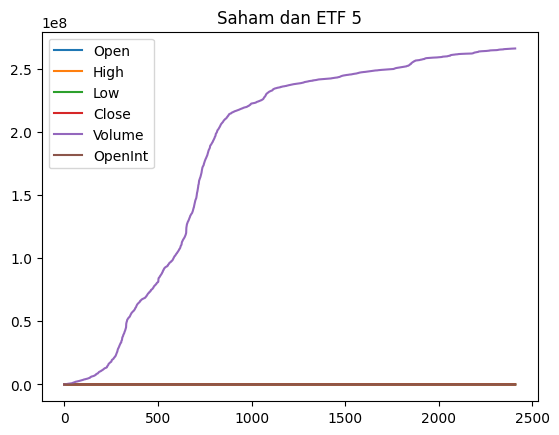

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('Saham dan ETF 5')

Text(0.5, 1.0, 'Saham Autocorrelation plot')

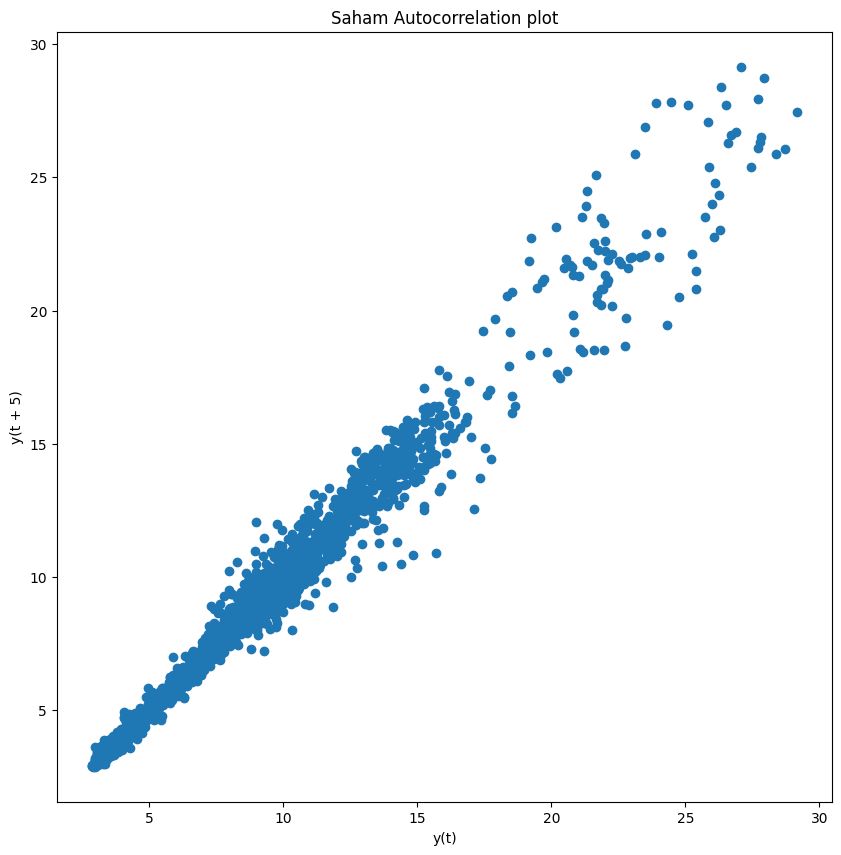

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Saham Autocorrelation plot')

In [ ]:
df['Date'][1680]

'2014-12-16'

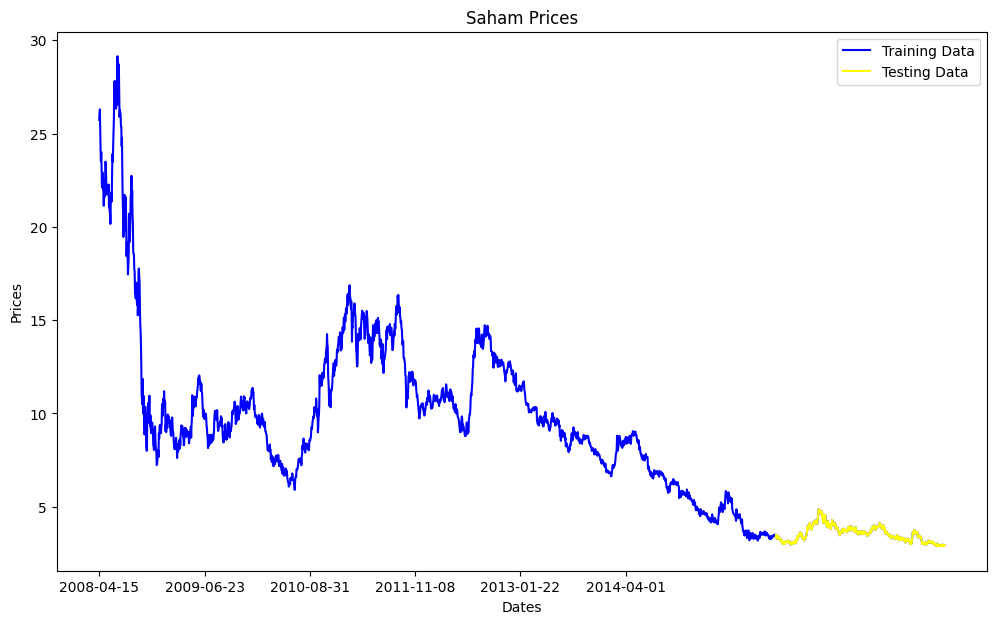

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Saham Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'yellow', label='Testing Data')
plt.xticks(np.arange(0,1785, 300), df['Date'][0:1785:300])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.008
Symmetric mean absolute percentage error: 1.915


<ipython-input-11-bec4e9185ecb>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "red" (-> color=(1.0, 0.0, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'red', color='blue', label='Training Data')


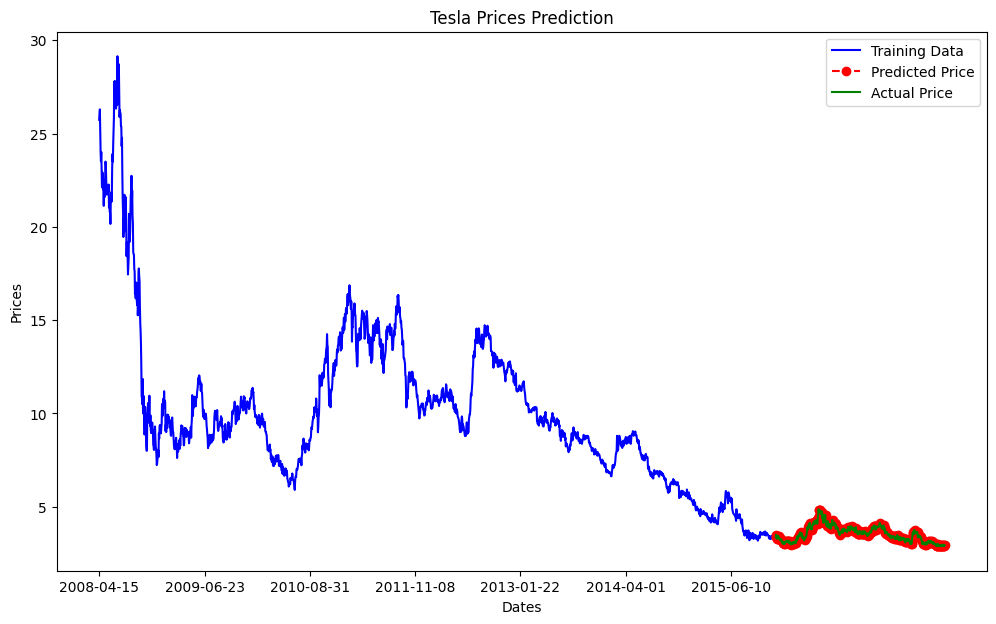

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'red', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='green', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

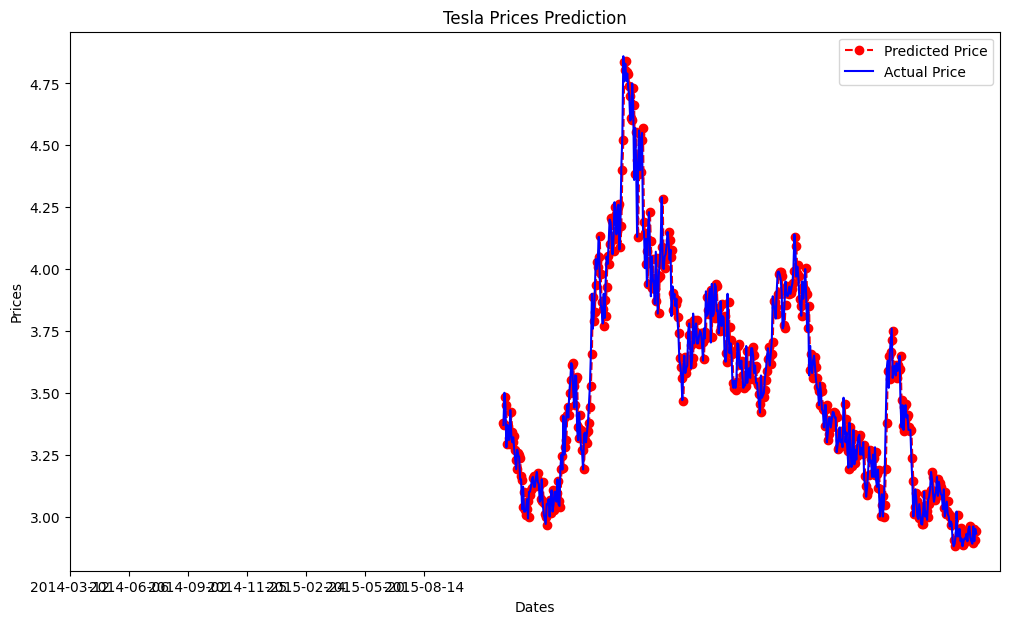

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='blue', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()